In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans 

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

RAND = 24

In [2]:
dataset = pd.read_csv('data.csv')
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,98000.0,48999.500000,28290.307527,0.000000,24499.750000,48999.500000,73499.250000,97999.000000
f_00,98000.0,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.0,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.0,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.0,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.0,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.0,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.0,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.0,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.0,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000


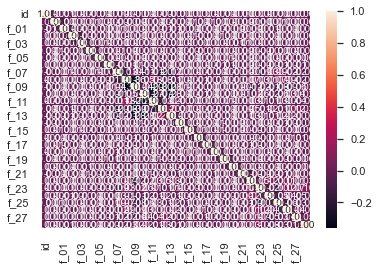

In [3]:
sns.set(rc={'figure.figsize':(20,16)})
sns.heatmap(dataset.corr(), annot=True, fmt='.2f')
plt.show()

In [4]:
def evaluation(X, y):
    return [round(silhouette_score(X,y),4),
            round(calinski_harabasz_score(X,y),4),
            round(davies_bouldin_score(X,y),4)]

In [5]:
## chose important feature
best_features = [f'f_{i:02d}' for i in list(range(7, 14)) + list(range(22,29))]
dataset = dataset[best_features]

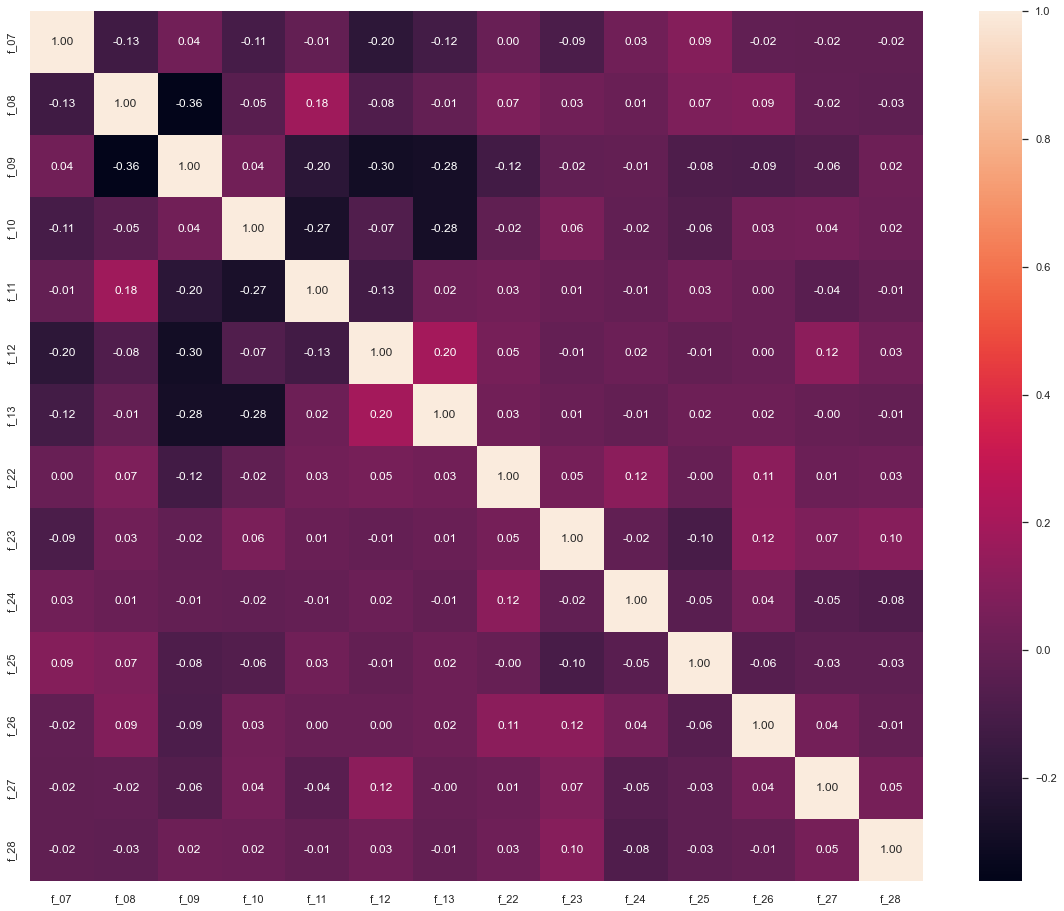

In [6]:
sns.set(rc={'figure.figsize':(20,16)})
sns.heatmap(dataset.corr(), annot=True, fmt='.2f')
plt.show()

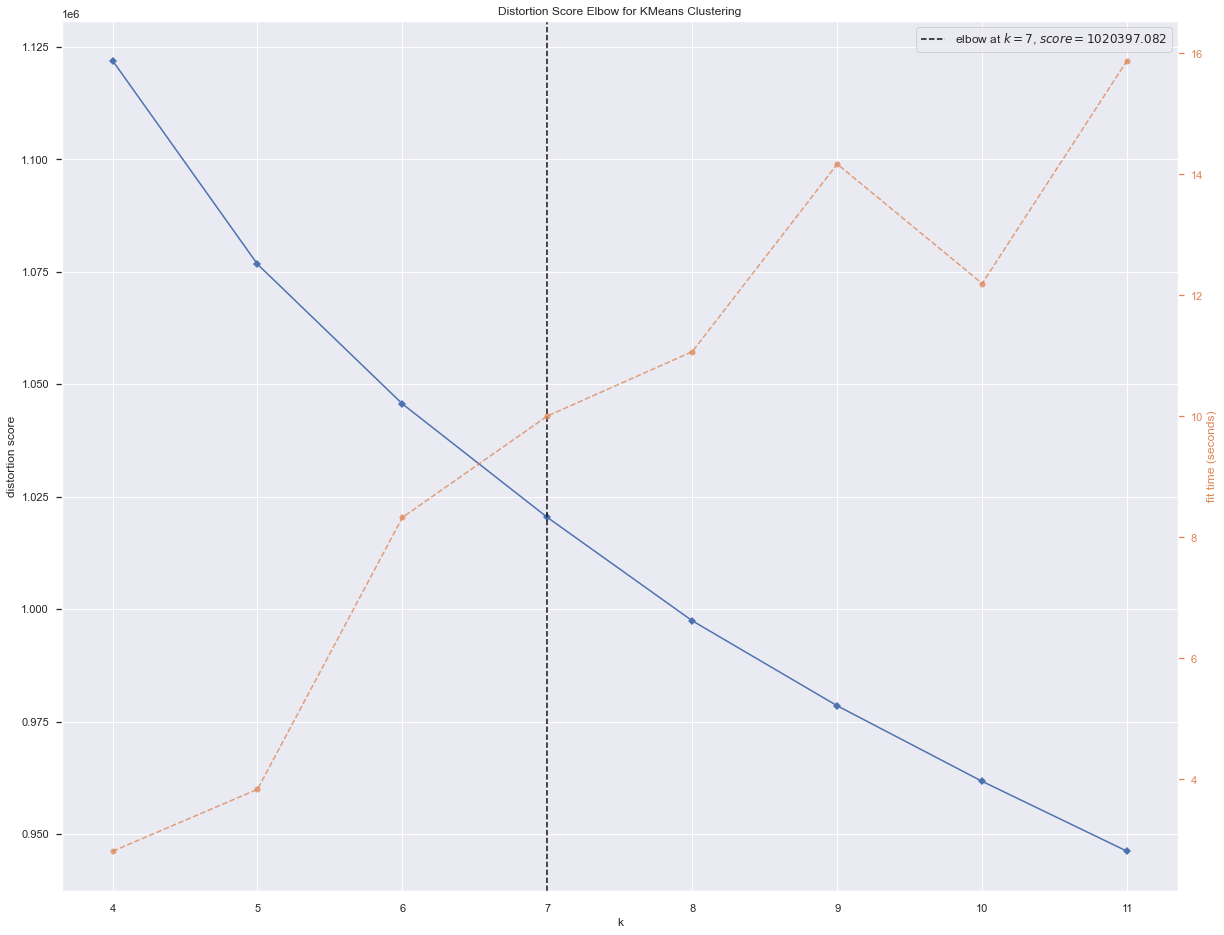

In [7]:
def test_model(Model, X):
    sc = StandardScaler()
    X_sc = sc.fit_transform(X)
    vis_model = KElbowVisualizer(Model, k=(4,12))
    vis_model.fit(X_sc)
    vis_model.show()
test_model(KMeans(random_state = RAND),dataset)

In [8]:
def test_model_KMeans(Model,X):
    Scaler = [('None', False), ('MinMax',MinMaxScaler()),('Standard',StandardScaler()),('PowerTransformer', PowerTransformer())]
    
    for scaler in Scaler:
        X_sc = X.copy()
        if scaler[0] != 'None':
            sc = scaler[1]
            X_sc = sc.fit_transform(X_sc)
        print(scaler[0], end = '')
        
        model = Model
        model.fit(X_sc)
        y_pred = model.labels_
        metrics = evaluation(X_sc, y_pred)
        print(metrics)
test_model_KMeans(KMeans(n_clusters=7, random_state = RAND), dataset)

None[0.1247, 13124.3815, 1.9036]
MinMax[0.0863, 6965.6273, 2.3687]
Standard[0.0747, 5627.6498, 2.5488]
PowerTransformer[0.0722, 5435.315, 2.5794]


In [15]:
df_pred = pd.read_csv('sample_submission.csv')
df_pred.head()

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [25]:
def gen_res(Model, X):
    sc = StandardScaler()
    X_sc = sc.fit_transform(X)
    model = Model
    Model.fit(X_sc)
    y_pred = model.labels_
    metrics = evaluation(X_sc, y_pred)
    print(metrics)
    return y_pred
res_Kmean = gen_res(KMeans(n_clusters = 7, random_state = RAND), dataset)

[0.0747, 5627.6498, 2.5488]


In [26]:
df_pred['Predicted'] = res_Kmean
df_pred.to_csv('res_KMeans.csv', index=False)

In [27]:
df_pred.head()

,Id,Predicted
0,0,1
1,1,0
2,2,5
3,3,2
4,4,0


# Gaussian Mixture models


In [31]:
def gen_GMM(Model, X):
    sc = PowerTransformer()
    X_sc = sc.fit_transform(X)
    model = Model
    Model.fit(X_sc)
    y_pred = model.predict(X_sc)
    metrics = evaluation(X_sc, y_pred)
    print(metrics)
    return y_pred
res_GMM = gen_GMM(GaussianMixture(n_components = 7, random_state=RAND), dataset)
df_pred['Predicted'] = res_GMM
df_pred.to_csv('res_GMM.csv', index=False)
df_pred.head()

[0.0411, 3972.3638, 3.7426]


,Id,Predicted
0,0,6
1,1,3
2,2,6
3,3,1
4,4,4
